<a href="https://colab.research.google.com/github/ankur2825/Python-Data-Analysis/blob/main/Airlines_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
sns.set()
le=LabelEncoder()

In [163]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [164]:
df=pd.read_excel(r'/content/Airline Data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


#DATA TRANSFORMATION

# Data Cleaning

In [166]:
df.drop('Additional_Info',axis=1,inplace=True)
#df.drop('Route',axis=1,inplace=True)
df['Route']=df['Destination']+" to "+df['Source']
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,New Delhi to Banglore,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,Banglore to Kolkata,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,Cochin to Delhi,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,Banglore to Kolkata,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,New Delhi to Banglore,16:50,21:35,4h 45m,1 stop,13302


In [167]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df['Journey_Year']=df['Date_of_Journey'].dt.year
df['Journey_Weekday']=df['Date_of_Journey'].dt.weekday

<ipython-input-167-379f6ce0edd9>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  Journey_Day      10682 non-null  int32         
 11  Journey_Month    10682 non-null  int32         
 12  Journey_Year     10682 non-null  int32         
 13  Journey_Weekday  10682 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(

In [169]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [170]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,6
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019,6
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4


In [171]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min'].fillna(0,inplace=True)
df['Duration_min'].unique()
df=df.query('Duration_Hour!="5m"')
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)
df['Duration(min)']=df['Duration_Hour']*60+df['Duration_min']
df['Duration(Hr)']=df['Duration(min)']/60
df['Duration_min'].fillna(0,inplace=True)
df=df.query('Duration_Hour!="5m"')


<ipython-input-171-d016ea68ec2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_Hour']=df['Duration_Hour'].astype(int)
<ipython-input-171-d016ea68ec2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_min']=df['Duration_min'].astype(int)
<ipython-input-171-d016ea68ec2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [172]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration_Hour,Duration_min,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,6,2,50,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2,7,25,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019,6,19,0,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6,5,25,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4,4,45,285,4.750000


In [173]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [174]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration_Hour,Duration_min,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20,01:10,2h 50m,non-stop,3897,24,3,2019,6,2,50,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2,7,25,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25,04:25,19h,2 stops,13882,9,6,2019,6,19,0,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6,5,25,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4,4,45,285,4.750000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  object        
 6   Arrival_Time     10681 non-null  object        
 7   Duration         10681 non-null  object        
 8   Total_Stops      10681 non-null  object        
 9   Price            10681 non-null  int64         
 10  Journey_Day      10681 non-null  int32         
 11  Journey_Month    10681 non-null  int32         
 12  Journey_Year     10681 non-null  int32         
 13  Journey_Weekday  10681 non-null  int32         
 14  Duration_Hour    10681 non-null  int64     

In [176]:
df.drop(['Duration','Duration_Hour','Duration_min'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  object        
 6   Arrival_Time     10681 non-null  object        
 7   Total_Stops      10681 non-null  object        
 8   Price            10681 non-null  int64         
 9   Journey_Day      10681 non-null  int32         
 10  Journey_Month    10681 non-null  int32         
 11  Journey_Year     10681 non-null  int32         
 12  Journey_Weekday  10681 non-null  int32         
 13  Duration(min)    10681 non-null  int64         
 14  Duration(Hr)     10681 non-null  float64   

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  object        
 6   Arrival_Time     10681 non-null  object        
 7   Total_Stops      10681 non-null  object        
 8   Price            10681 non-null  int64         
 9   Journey_Day      10681 non-null  int32         
 10  Journey_Month    10681 non-null  int32         
 11  Journey_Year     10681 non-null  int32         
 12  Journey_Weekday  10681 non-null  int32         
 13  Duration(min)    10681 non-null  int64         
 14  Duration(Hr)     10681 non-null  float64   

In [178]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20,01:10,non-stop,3897,24,3,2019,6,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50,13:15,2 stops,7662,1,5,2019,2,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25,04:25,2 stops,13882,9,6,2019,6,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05,23:30,1 stop,6218,12,5,2019,6,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50,21:35,1 stop,13302,1,3,2019,4,285,4.750000


In [179]:
totstop={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(totstop)
Total_Stops=df['Total_Stops'].unique()
Total_Stops

array([0, 2, 1, 3, 4])

In [180]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.time
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20:00,01:10:00,0,3897,24,3,2019,6,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50:00,13:15:00,2,7662,1,5,2019,2,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25:00,04:25:00,2,13882,9,6,2019,6,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05:00,23:30:00,1,6218,12,5,2019,6,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50:00,21:35:00,1,13302,1,3,2019,4,285,4.750000


In [181]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20:00,01:10:00,0,3897,24,3,2019,6,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50:00,13:15:00,2,7662,1,5,2019,2,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25:00,04:25:00,2,13882,9,6,2019,6,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05:00,23:30:00,1,6218,12,5,2019,6,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50:00,21:35:00,1,13302,1,3,2019,4,285,4.750000


# Outlier Removal

<Axes: ylabel='Price'>

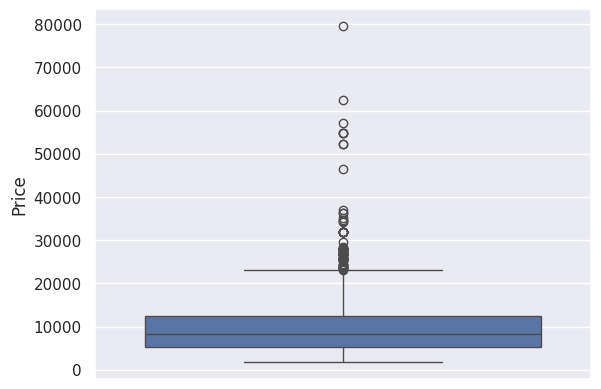

In [182]:
sns.boxplot(df['Price'])

In [183]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

<Axes: ylabel='Duration(min)'>

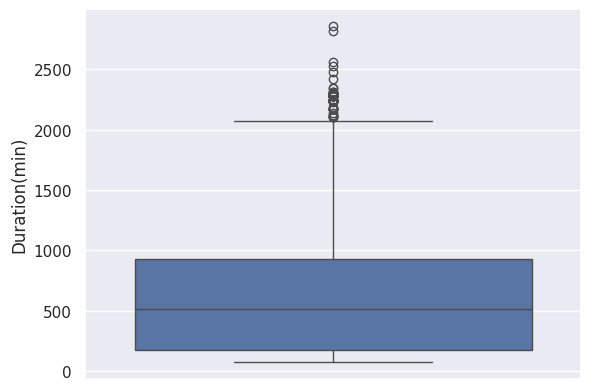

In [184]:
sns.boxplot(df['Duration(min)'])

In [185]:
Q1 = df['Duration(min)'].quantile(0.25)
Q3 = df['Duration(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration(min)'] >= lower_bound) & (df['Duration(min)'] <= upper_bound)]

# EDA

## Overview

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10515 non-null  object        
 1   Date_of_Journey  10515 non-null  datetime64[ns]
 2   Source           10515 non-null  object        
 3   Destination      10515 non-null  object        
 4   Route            10515 non-null  object        
 5   Dep_Time         10515 non-null  object        
 6   Arrival_Time     10515 non-null  object        
 7   Total_Stops      10515 non-null  int64         
 8   Price            10515 non-null  int64         
 9   Journey_Day      10515 non-null  int32         
 10  Journey_Month    10515 non-null  int32         
 11  Journey_Year     10515 non-null  int32         
 12  Journey_Weekday  10515 non-null  int32         
 13  Duration(min)    10515 non-null  int64         
 14  Duration(Hr)     10515 non-null  float64   

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

<Figure size 2000x2000 with 0 Axes>

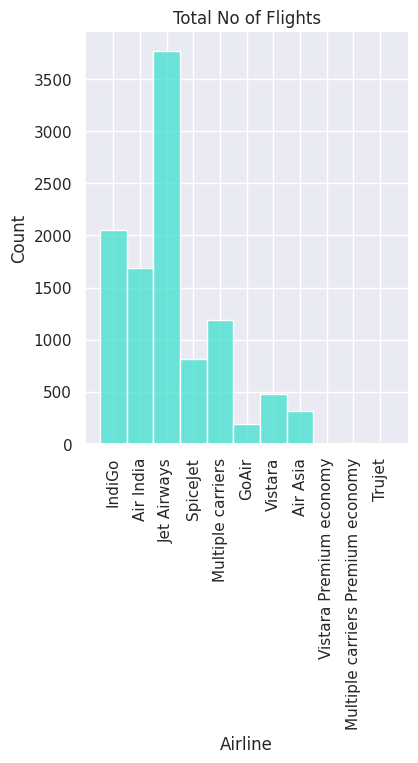

In [187]:
plt.figure(figsize=(20,20))
sns.displot(df['Airline'],color='Turquoise')
plt.title('Total No of Flights')
plt.xticks(rotation=90)

From the Above Data, It is found that Majority of Flights are from Jet Airways, i.e 3766

With only 1 Flight from Trujet

In [188]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3766
IndiGo,2053
Air India,1684
Multiple carriers,1186
SpiceJet,817
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [189]:
average=df.groupby('Airline').agg({'Price':'mean'})
average


,Price
Airline,
Air Asia,5590.260188
Air India,9402.000594
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11342.569039
Multiple carriers,10750.907251
Multiple carriers Premium economy,11418.846154
SpiceJet,4315.116279
Trujet,4140.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'Multiple carriers Premium economy'),
  Text(7, 0, 'SpiceJet'),
  Text(8, 0, 'Trujet'),
  Text(9, 0, 'Vistara'),
  Text(10, 0, 'Vistara Premium economy')])

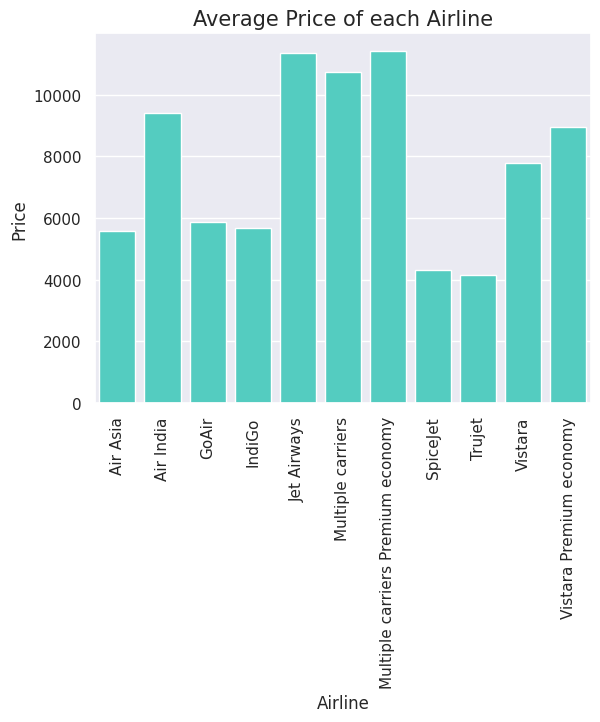

In [190]:
sns.barplot(x='Airline',y='Price',data=average,color='turquoise')
plt.title('Average Price of each Airline',fontsize=15)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'Multiple carriers Premium economy'),
  Text(7, 0, 'SpiceJet'),
  Text(8, 0, 'Trujet'),
  Text(9, 0, 'Vistara'),
  Text(10, 0, 'Vistara Premium economy')])

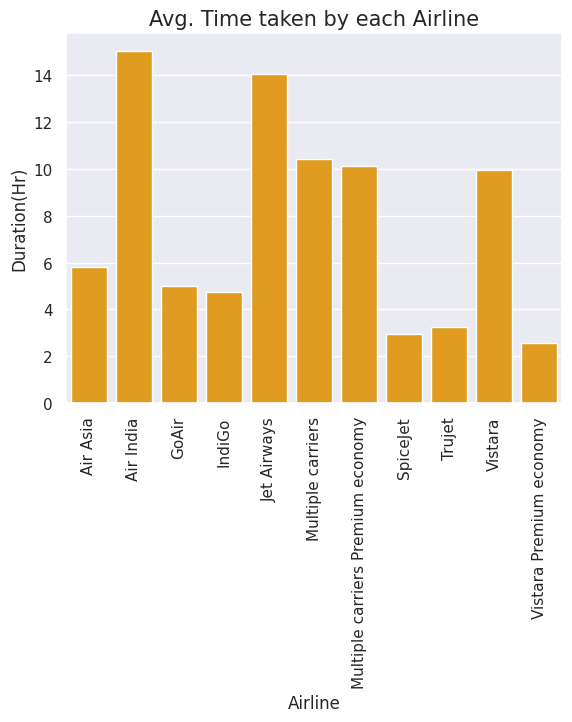

In [191]:
avgdurationhr=df.groupby('Airline').agg({'Duration(Hr)':'mean'})
avgdurationhr
sns.barplot(x='Airline',y='Duration(Hr)',data=avgdurationhr,color='Orange')
plt.title('Avg. Time taken by each Airline',fontsize=15)
plt.xticks(rotation=90)

<ipython-input-192-30cca67e74ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Journey_Month',y='Price',data=avgprice_month,palette='rocket')


([0, 1, 2, 3],
 [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')])

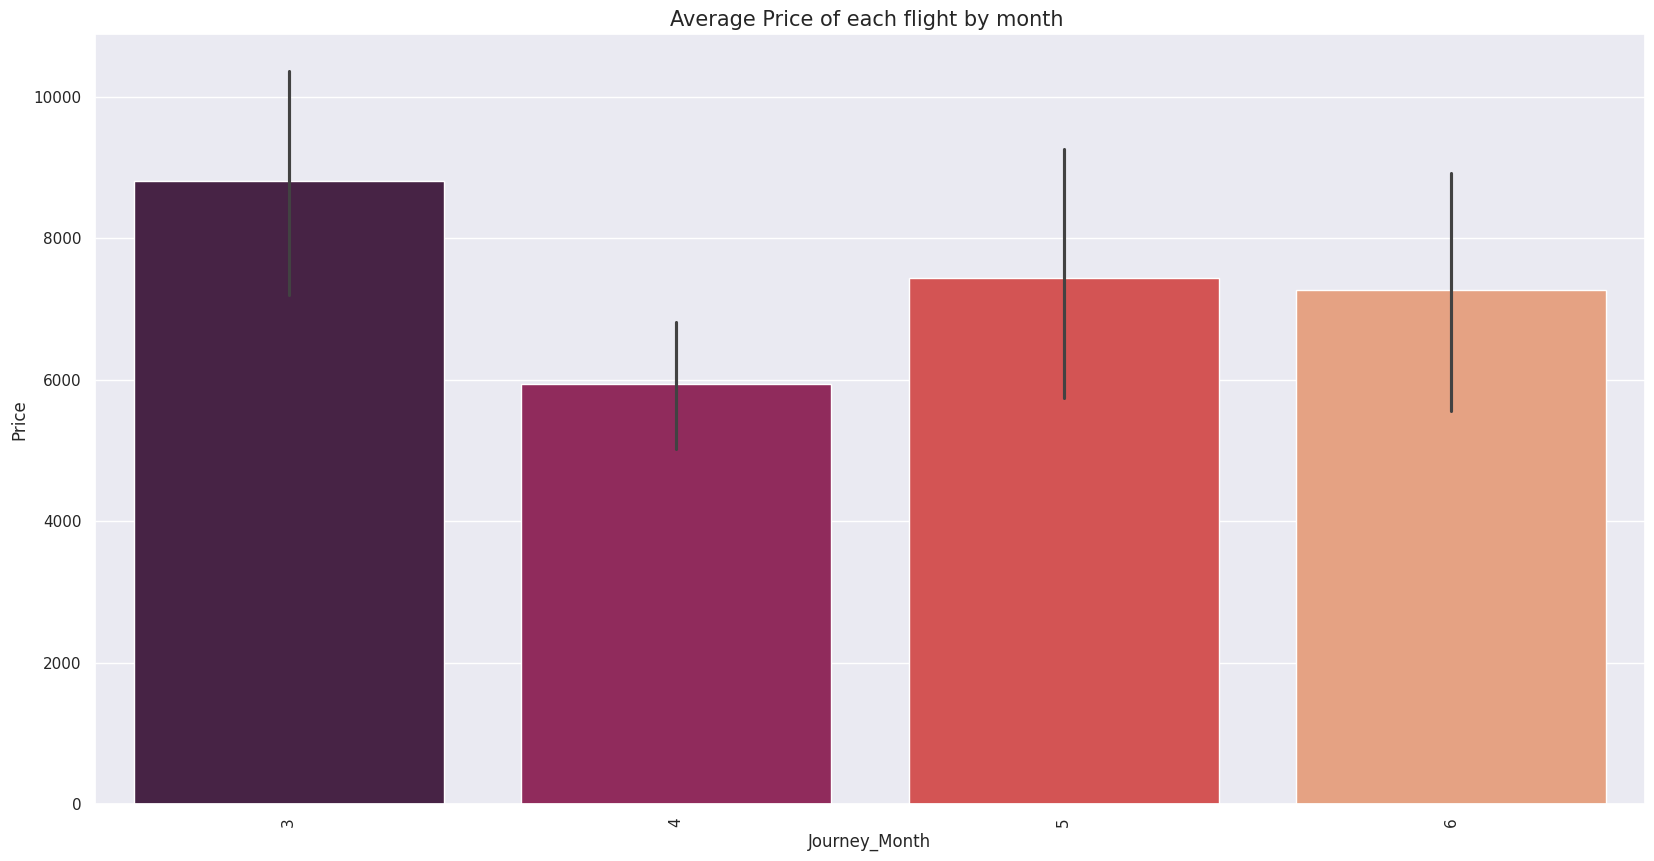

In [192]:
avgprice_month=df.groupby(['Journey_Month','Airline']).agg({'Price':'mean'})
avgprice_month

plt.figure(figsize=(20,10))
sns.barplot(x='Journey_Month',y='Price',data=avgprice_month,palette='rocket')
plt.title('Average Price of each flight by month ',fontsize=15)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi to Banglore'),
  Text(1, 0, 'Banglore to Kolkata'),
  Text(2, 0, 'Cochin to Delhi'),
  Text(3, 0, 'Kolkata to Chennai'),
  Text(4, 0, 'Delhi to Banglore'),
  Text(5, 0, 'Hyderabad to Mumbai')])

<Figure size 2000x1000 with 0 Axes>

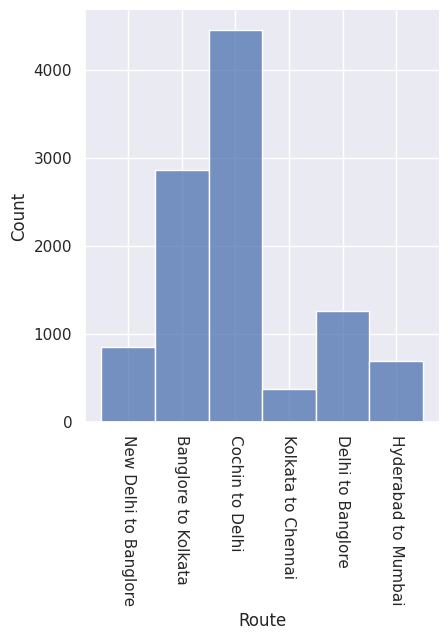

In [193]:
plt.figure(figsize=(20,10))
sns.displot(df['Route'])
plt.xticks(rotation=-90)

From the Above Data, it is found that , Majority of flights are Going from Cochin to Delhi, with Least going from kolkata to Chennai

34.5

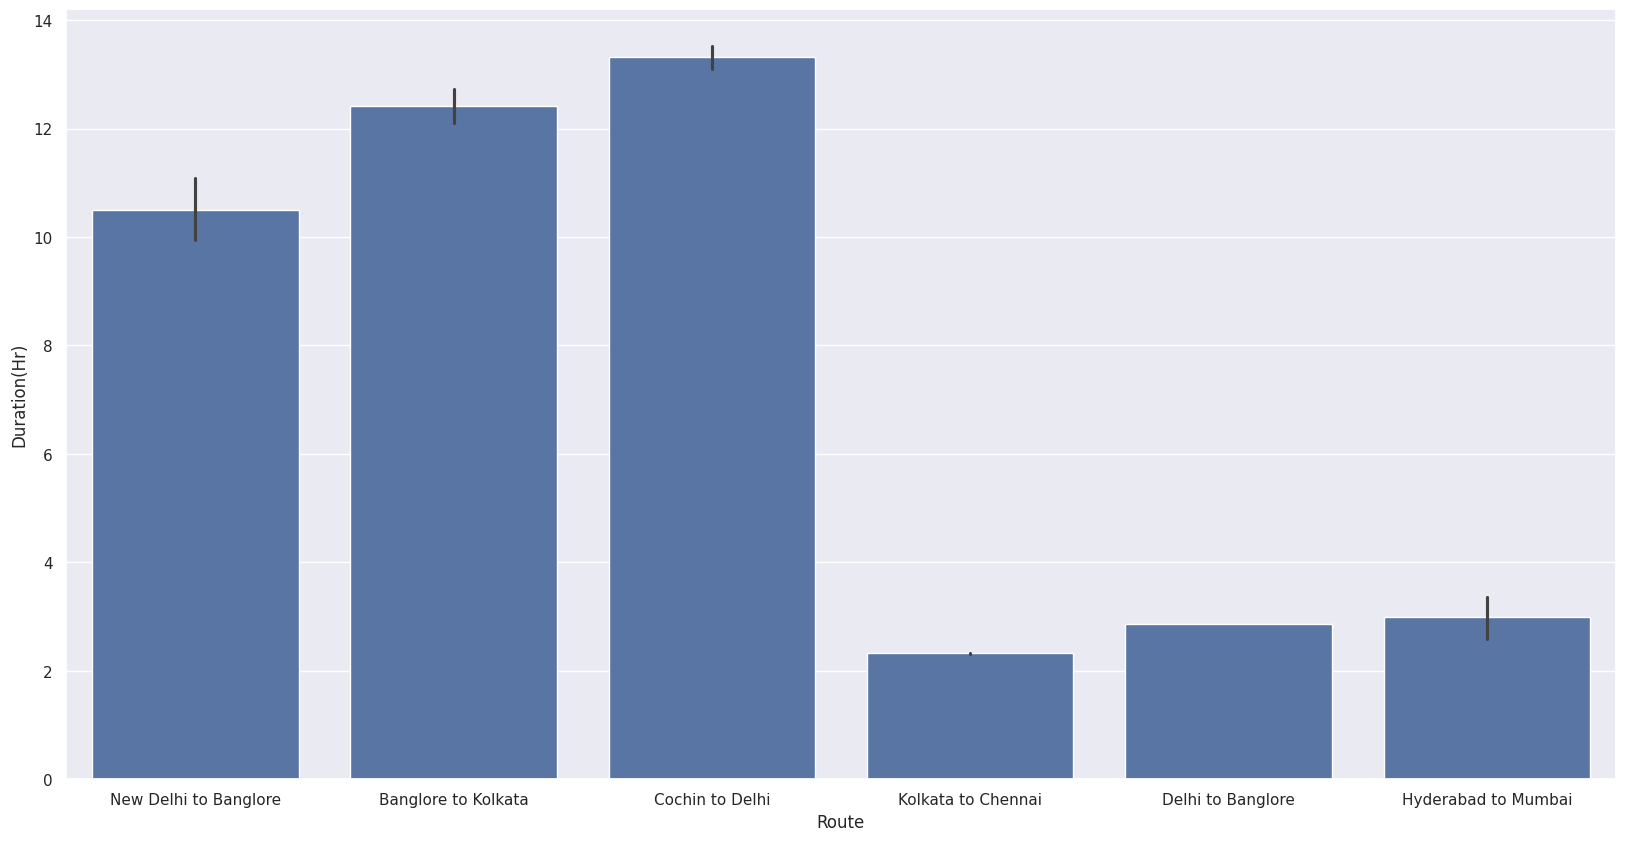

In [194]:
plt.figure(figsize=(20,10))
sns.barplot(x='Route',y='Duration(Hr)',data=df)
df['Duration(Hr)'].max()

34.5

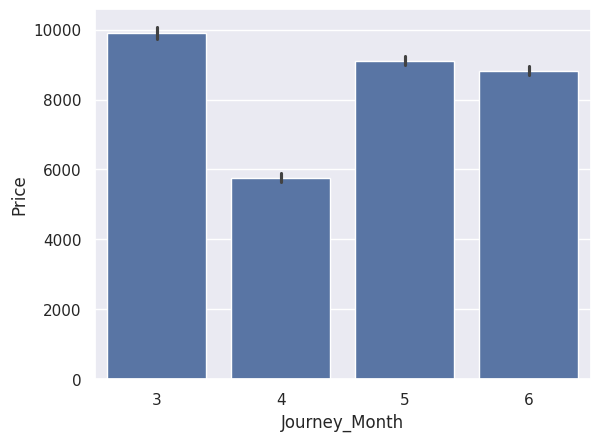

In [195]:
sns.barplot(x='Journey_Month',y='Price',data=df)
df['Duration(Hr)'].max()

1.

In [196]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20:00,01:10:00,0,3897,24,3,2019,6,170,2.833333
1,Air India,2019-05-01,Kolkata,Banglore,Banglore to Kolkata,05:50:00,13:15:00,2,7662,1,5,2019,2,445,7.416667
2,Jet Airways,2019-06-09,Delhi,Cochin,Cochin to Delhi,09:25:00,04:25:00,2,13882,9,6,2019,6,1140,19.000000
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05:00,23:30:00,1,6218,12,5,2019,6,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50:00,21:35:00,1,13302,1,3,2019,4,285,4.750000


<ipython-input-197-02973f96ba91>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Airline',palette='Grn',data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

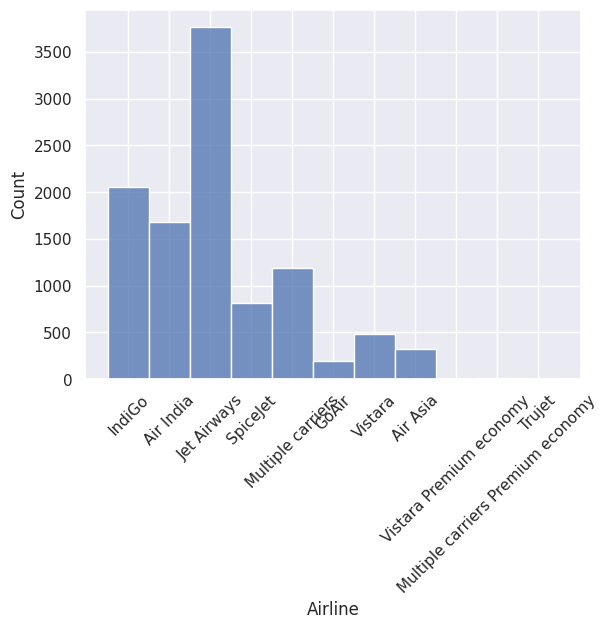

In [197]:
sns.histplot(x='Airline',palette='Grn',data=df)
plt.xticks(rotation=45)

In [198]:
dfjetairway=df.query('Airline=="Jet Airways"')
dfIndigo=df.query('Airline=="IndiGo"')
dfAirIndia=df.query('Airline=="Air India"')
dfSpiceJet=df.query('Airline=="SpiceJet"')
dfAirAsia=df.query('Airline=="Air Asia"')
dfVistara=df.query('Airline=="Vistara"')
dfGoAir=df.query('Airline=="GoAir"')
dfMultiple=df.query('Airline=="Multiple carriers"')
dfIndigo.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,IndiGo,2019-03-24,Banglore,New Delhi,New Delhi to Banglore,22:20:00,01:10:00,0,3897,24,3,2019,6,170,2.833333
3,IndiGo,2019-05-12,Kolkata,Banglore,Banglore to Kolkata,18:05:00,23:30:00,1,6218,12,5,2019,6,325,5.416667
4,IndiGo,2019-03-01,Banglore,New Delhi,New Delhi to Banglore,16:50:00,21:35:00,1,13302,1,3,2019,4,285,4.750000
11,IndiGo,2019-04-18,Kolkata,Banglore,Banglore to Kolkata,20:20:00,22:55:00,0,4174,18,4,2019,3,155,2.583333
14,IndiGo,2019-04-24,Kolkata,Banglore,Banglore to Kolkata,17:15:00,19:50:00,0,4804,24,4,2019,2,155,2.583333


<Axes: xlabel='Price', ylabel='Duration(min)'>

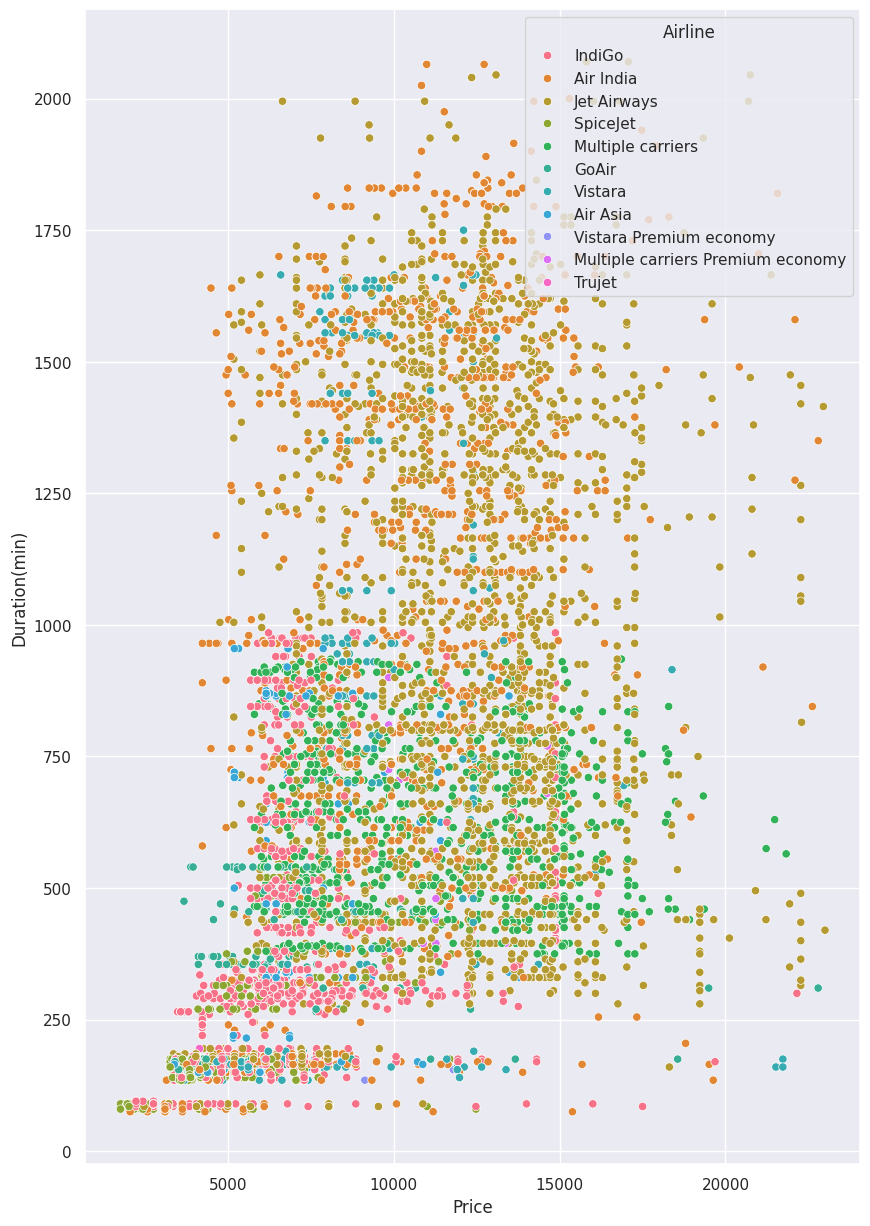

In [199]:
plt.figure(figsize=(10,15))
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=df)

<Axes: xlabel='Price', ylabel='Duration(min)'>

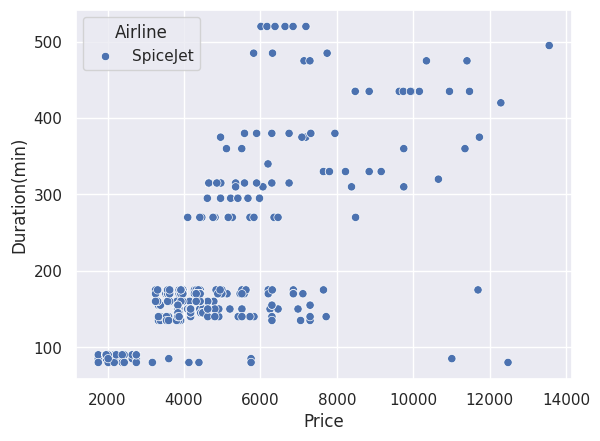

In [200]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfSpiceJet)

<Axes: xlabel='Price', ylabel='Duration(min)'>

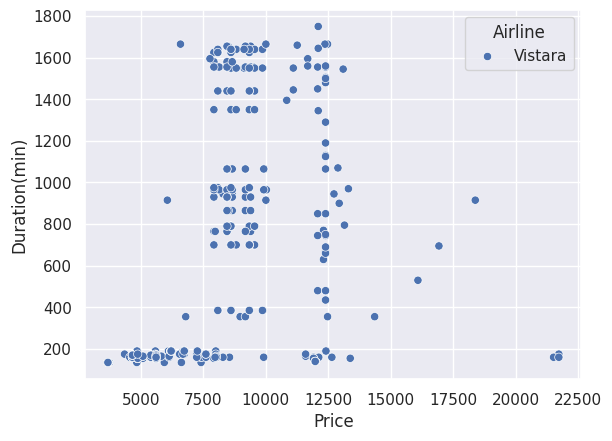

In [201]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfVistara)

<Axes: xlabel='Price', ylabel='Duration(min)'>

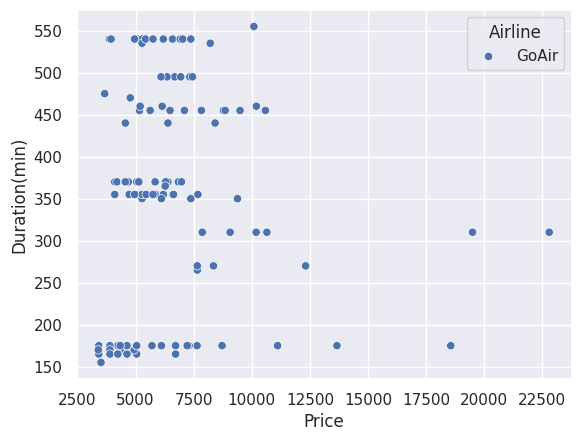

In [202]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfGoAir)

<Axes: xlabel='Price', ylabel='Duration(min)'>

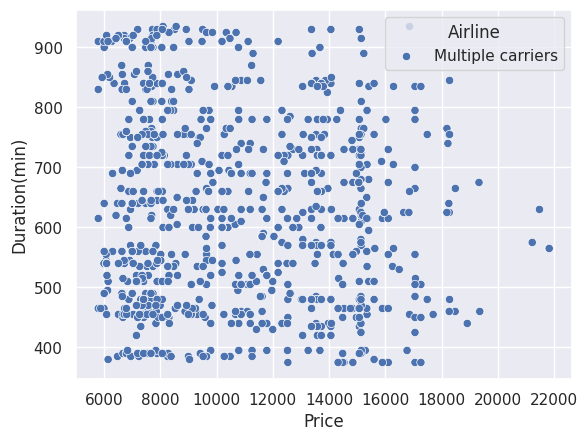

In [203]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfMultiple)

<Axes: xlabel='Price', ylabel='Duration(min)'>

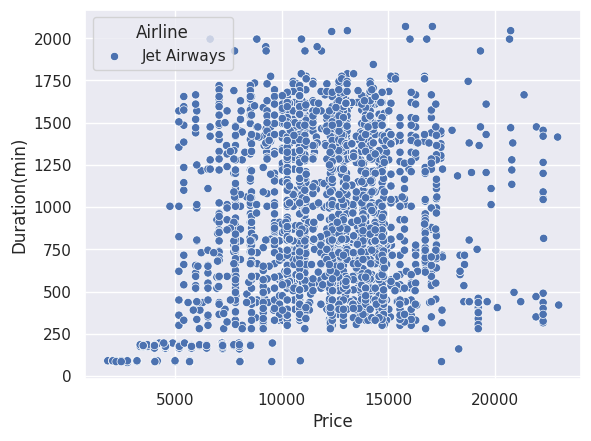

In [204]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfjetairway)

<Axes: xlabel='Price', ylabel='Duration(min)'>

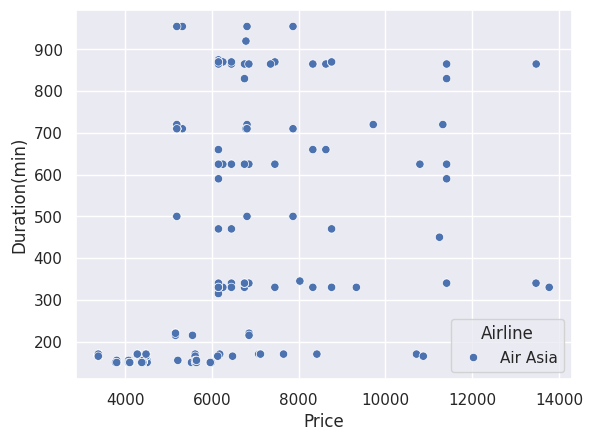

In [205]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfAirAsia)


<Axes: xlabel='Price', ylabel='Duration(min)'>

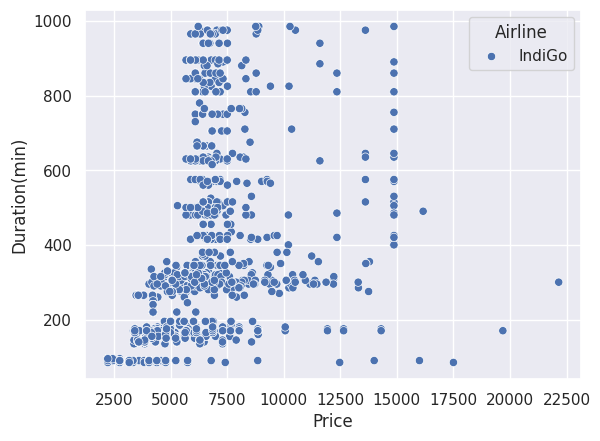

In [206]:
sns.scatterplot(y='Duration(min)',x='Price',hue='Airline',data=dfIndigo)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10515 non-null  object        
 1   Date_of_Journey  10515 non-null  datetime64[ns]
 2   Source           10515 non-null  object        
 3   Destination      10515 non-null  object        
 4   Route            10515 non-null  object        
 5   Dep_Time         10515 non-null  object        
 6   Arrival_Time     10515 non-null  object        
 7   Total_Stops      10515 non-null  int64         
 8   Price            10515 non-null  int64         
 9   Journey_Day      10515 non-null  int32         
 10  Journey_Month    10515 non-null  int32         
 11  Journey_Year     10515 non-null  int32         
 12  Journey_Weekday  10515 non-null  int32         
 13  Duration(min)    10515 non-null  int64         
 14  Duration(Hr)     10515 non-null  float64   

<Axes: xlabel='Route', ylabel='Duration(min)'>

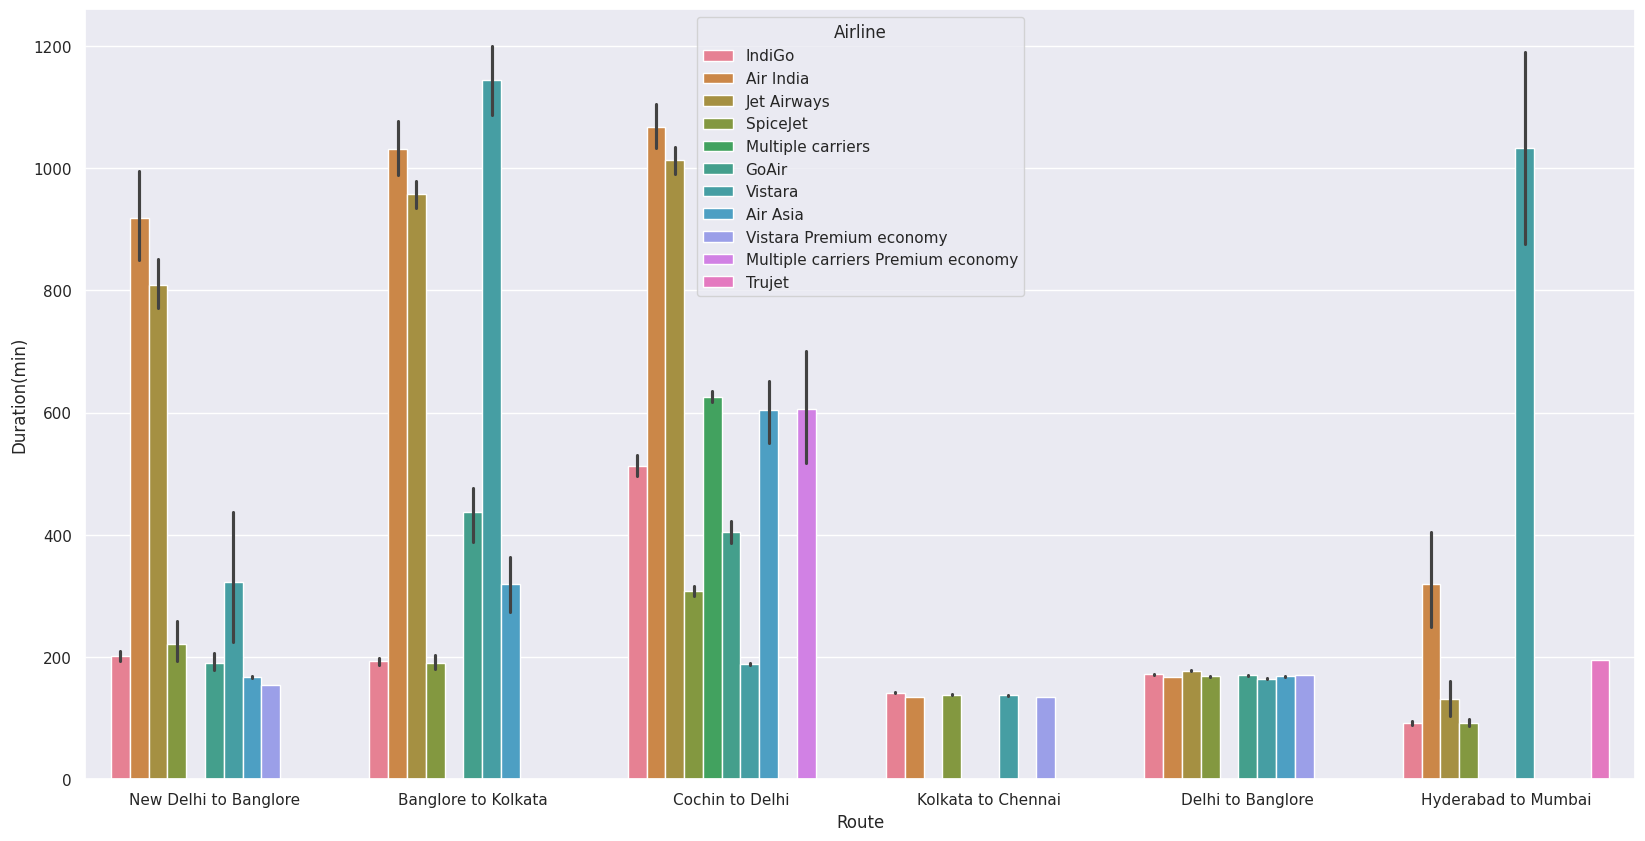

In [208]:
plt.figure(figsize=(20,10))
sns.barplot(y='Duration(min)',x='Route',hue='Airline',data=df)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10515 non-null  int64         
 1   Date_of_Journey  10515 non-null  datetime64[ns]
 2   Source           10515 non-null  int64         
 3   Destination      10515 non-null  int64         
 4   Route            10515 non-null  object        
 5   Dep_Time         10515 non-null  object        
 6   Arrival_Time     10515 non-null  object        
 7   Total_Stops      0 non-null      float64       
 8   Price            10515 non-null  int64         
 9   Journey_Day      10515 non-null  int32         
 10  Journey_Month    10515 non-null  int32         
 11  Journey_Year     10515 non-null  int32         
 12  Journey_Weekday  10515 non-null  int32         
 13  Duration(min)    10515 non-null  int64         
 14  Duration(Hr)     10515 non-null  float64   

# Data Transformation

In [212]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Route']=le.fit_transform(df['Route'])
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Journey_Weekday,Duration(min),Duration(Hr)
0,3,2019-03-24,0,5,5,22:20:00,01:10:00,NaN,3897,24,3,2019,6,170,2.833333
1,1,2019-05-01,3,0,0,05:50:00,13:15:00,NaN,7662,1,5,2019,2,445,7.416667
2,4,2019-06-09,2,1,1,09:25:00,04:25:00,NaN,13882,9,6,2019,6,1140,19.000000
3,3,2019-05-12,3,0,0,18:05:00,23:30:00,NaN,6218,12,5,2019,6,325,5.416667
4,3,2019-03-01,0,5,5,16:50:00,21:35:00,NaN,13302,1,3,2019,4,285,4.750000
